# Импорты

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import k, e, m_e, pi, h

# Загрузка данных измерений

In [2]:
path = 'data/'

c_39pF = np.genfromtxt('%sc_39pF.txt' % path)

iv_b_t_300k = np.genfromtxt('%siv_b_t_300k.txt' % path)
iv_b_t_77k = np.genfromtxt('%siv_b_t_77k.txt' % path)
iv_g_t_300k = np.genfromtxt('%siv_g_t_300k.txt' % path)
iv_g_t_77k = np.genfromtxt('%siv_g_t_77k.txt' % path)

cv_b_t_300k = np.genfromtxt('%scv_b_t_300k.txt' % path)
cv_b_t_77k = np.genfromtxt('%scv_b_t_77k.txt' % path)
cv_g_t_300k = np.genfromtxt('%scv_g_t_300k.txt' % path)
cv_g_t_77k = np.genfromtxt('%scv_g_t_77k.txt' % path)

# Обработка ВАХ
## Задание
По вольт-амперной характеристике полупроводникового диода определить величины $R_s$ и $\varphi_k$ для $Т = 300\,\text{к}$ и $Т = 77\,\text{к}$. Объяснить наблюдаемое изменение ВАХ при охлаждении диода от комнатной температуры до температуры жидкого азота.

Посчитаем, какому напряжению соответствуют рассматриваемые температуры.

In [3]:
print(f'T = 300 к --> {300 * k / e:.2f} В')
print(f'T = 77 к --> {77 * k / e:.2f} В')

T = 300 к --> 0.03 В
T = 77 к --> 0.01 В


## ВАХ образцов

Теоретическая формула для ВАХ имеет вид
$$I = I_s \Bigl( \mathrm{exp}\Bigl( \dfrac{q(U-IR_s)}{kT} \Bigr) - 1 \Bigr).$$
Удобно переписать ВАХ в виде
$$ I = \frac{U}{R_s} - \frac{kT}{qR_s} \mathrm{ln}\Bigl( \frac{I}{I_s} + 1\Bigr). $$
При $I R_s \gg \varphi_k$ ВАХ выходит на линейную зависимость, то есть зависимостью второго члена правой части верхного выражения от тока можно пренебречь. На графиках жирным отмечены участки примерно линейной зависимости.

Из линейной аппроксимации ВАХ мы находим некоторую прямую $I(U) = a U + b$, отсюда получаем для сопротивления толщи полупроводника $R_s = 1/a$ и $\Delta R_s = \Delta a/ a^2$, а для контактной разности потенциалов $\varphi_k = - b/a$ (определяется как точка пересечения с осью абсцисс) и $\Delta \varphi_k = (a \Delta b + b \Delta a )/a^2$

In [4]:
def lin_reg_err(v, i):
    a, b = np.polyfit(v, i, 1)

    a_err = np.sqrt((np.cov(i) / np.cov(v) - a**2) / (len(v) - 2))
    b_err = a_err * np.sqrt((v**2).mean())
    
    Rs = 1 / a
    Rs_err = a_err / a**2
    
    phi_k = - b / a
    phi_k_err = (a_err * b + b_err * a) / a**2

    return a, b, a_err, b_err, Rs, phi_k, Rs_err, phi_k_err

Rs_b_300 = 1.7379 +- 0.0115
phi_k_b_300 = 0.6978 +- 0.0003
Rs_b_77 = 0.7585 +- 0.0057
phi_k_b_77 = 1.0389 +- 0.0002
Rs_g_300 = 3.4454 +- 0.0090
phi_k_g_300 = 0.6740 +- 0.0003
Rs_g_77 = 1.1730 +- 0.0036
phi_k_g_77 = 1.0338 +- 0.0001


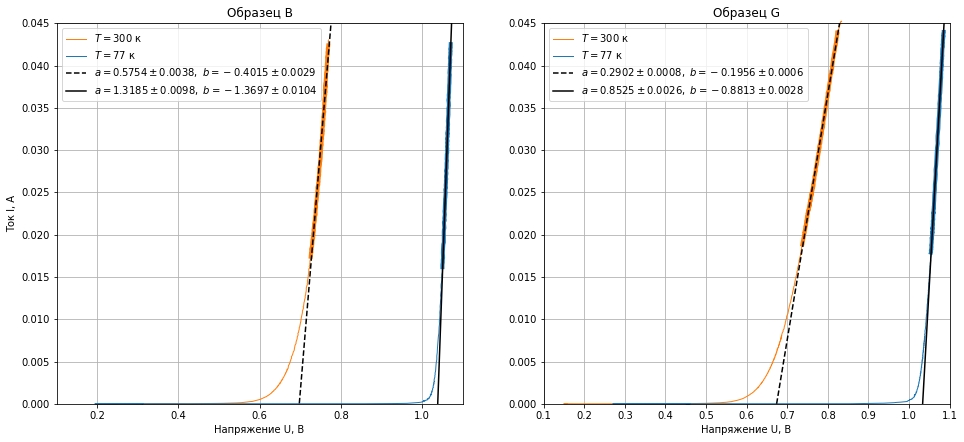

In [5]:
fig, (ax_b, ax_g) = plt.subplots(nrows=1, ncols=2, figsize=(16, 7))

ax_b.plot(iv_b_t_300k[:, 0], iv_b_t_300k[:, 1], c='C1',
          ls='-', lw=1, label=r'$Т = 300$ к', clip_on=False)
ax_b.plot(iv_b_t_77k[:, 0], iv_b_t_77k[:, 1], c='C0',
          ls='-', lw=1, label=r'$Т = 77$ к', clip_on=False)

ax_b.plot(iv_b_t_300k[250:-5, 0], iv_b_t_300k[250:-5, 1], c='C1',
          ls='-', lw=4, clip_on=False)

x = iv_b_t_300k[250:-5, 0]
y = iv_b_t_300k[250:-5, 1]

a, b, a_err, b_err, Rs, phi_k, Rs_err, phi_k_err= lin_reg_err(x, y)

print(f'Rs_b_300 = {Rs:.4f} +- {Rs_err:.4f}')
print(f'phi_k_b_300 = {phi_k:.4f} +- {phi_k_err:.4f}')

ax_b.plot(np.linspace(0.6, 0.8), a*np.linspace(0.6, 0.8)+b, c='black',
          ls='--',
          label=fr'$a={a:.4f}\pm{a_err:.4f},$ $b={b:.4f}\pm{b_err:.4f}$')

ax_b.plot(iv_b_t_77k[150:, 0], iv_b_t_77k[150:, 1], c='C0',
          ls='-', lw=4, clip_on=False)

x = iv_b_t_77k[150:, 0]
y = iv_b_t_77k[150:, 1]

a, b, a_err, b_err, Rs, phi_k, Rs_err, phi_k_err= lin_reg_err(x, y)

print(f'Rs_b_77 = {Rs:.4f} +- {Rs_err:.4f}')
print(f'phi_k_b_77 = {phi_k:.4f} +- {phi_k_err:.4f}')

ax_b.plot(np.linspace(1, 1.1), a*np.linspace(1, 1.1)+b, c='black',
          ls='-',
          label=fr'$a={a:.4f}\pm{a_err:.4f},$ $b={b:.4f}\pm{b_err:.4f}$')

ax_b.set_ylim([0, 0.045])
ax_b.set_xlim([0.1, 1.1])

ax_b.set_ylabel('Ток I, А')
ax_b.set_xlabel('Напряжение U, В')

ax_b.set_title('Образец B')
ax_b.legend()
ax_b.grid()

ax_g.plot(iv_g_t_300k[:, 0], iv_g_t_300k[:, 1], c='C1',
          ls='-', lw=1, label=r'$Т = 300$ к', clip_on=False)
ax_g.plot(iv_g_t_77k[:, 0], iv_g_t_77k[:, 1], c='C0',
          ls='-', lw=1, label=r'$Т = 77$ к', clip_on=False)

ax_g.plot(iv_g_t_300k[400:-20, 0], iv_g_t_300k[400:-20, 1], c='C1',
          ls='-', lw=4, clip_on=False)

x = iv_g_t_300k[400:-20, 0]
y = iv_g_t_300k[400:-20, 1]

a, b, a_err, b_err, Rs, phi_k, Rs_err, phi_k_err= lin_reg_err(x, y)

print(f'Rs_g_300 = {Rs:.4f} +- {Rs_err:.4f}')
print(f'phi_k_g_300 = {phi_k:.4f} +- {phi_k_err:.4f}')

ax_g.plot(np.linspace(0.6, 0.9), a*np.linspace(0.6, 0.9)+b, c='black',
          ls='--',
          label=fr'$a={a:.4f}\pm{a_err:.4f},$ $b={b:.4f}\pm{b_err:.4f}$')

ax_g.plot(iv_g_t_77k[400:, 0], iv_g_t_77k[400:, 1], c='C0',
          ls='-', lw=4, clip_on=False)

x = iv_g_t_77k[400:, 0]
y = iv_g_t_77k[400:, 1]

a, b, a_err, b_err, Rs, phi_k, Rs_err, phi_k_err= lin_reg_err(x, y)

print(f'Rs_g_77 = {Rs:.4f} +- {Rs_err:.4f}')
print(f'phi_k_g_77 = {phi_k:.4f} +- {phi_k_err:.4f}')

ax_g.plot(np.linspace(1, 1.1), a*np.linspace(1, 1.1)+b, c='black',
          ls='-',
          label=fr'$a={a:.4f}\pm{a_err:.4f},$ $b={b:.4f}\pm{b_err:.4f}$')

ax_g.set_ylim([0, 0.045])
ax_g.set_xlim([0.1, 1.1])

ax_g.set_xticks(np.linspace(0.1, 1.1, 11))

ax_g.set_xlabel('Напряжение U, В')

ax_g.set_title('Образец G')
ax_g.legend()
ax_g.grid()

# Обработка ВФХ
## Задание
0бработать результаты измерений вольт-фарадных характеристик диода при обратном смещении $C(U)$, построив зависимости $(S/С)^2$ от $U$, где $S$ - площадь р-n перехода (круг диаметром $0,8$ мм). Определить величины $N^*$, $l$ и $\varphi_k$ объяснить их изменение при охлаждении диода от комнатной температуры до температуры жидкого азота.

## Масштабирование единиц измерения ёмкости

В эксперименте ёмкость мерилась не пойми в каких единицах. Чтобы понять, какие это единицы, была подключена ёмкость 39 пФ. Кроме того, такое измерение позволит определить настоящий нуль измеряемой ёмкости образцов.

Чтобы получить из ёмкости $C_\text{wrong}$ в непонятных единицах к ёмкости $C_\text{pF}$ в пФ надо:
$$
C_\text{pF} = \frac{(C_\text{wrong} - C_0)}{A}\,\times\,39\,\mathrm{пФ},
$$
где величина $C_0$ соответсвует ложному нулю в непонятных единицах, а $A$ определяется как величина ёмкости 39 пФ, измеренная в непонятных единицах (с уже вычтенной $C_0$).

In [11]:
c_wrong = c_39pF[:, 1]

c_0 = c_wrong[c_wrong<0.3].mean()

A = (c_wrong - c_0)[c_wrong>1.7].mean()

def wrong2pF(c_wrong):
    return (c_wrong - c_0) / A * 39

## ВФХ

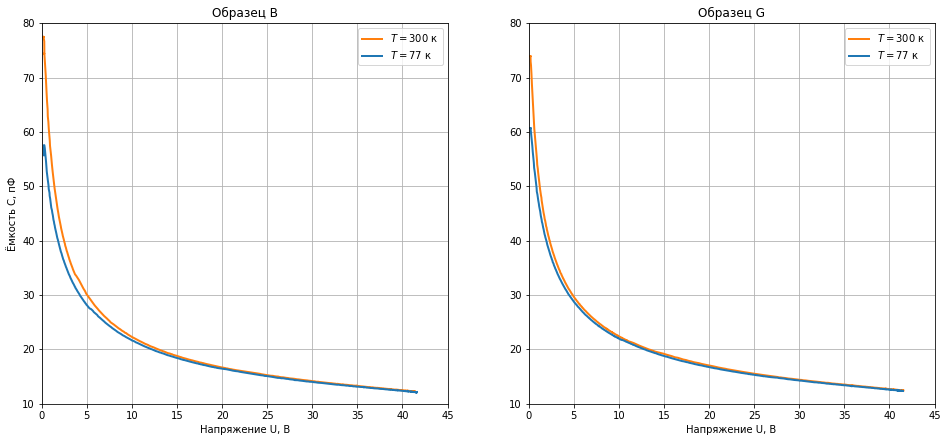

In [19]:
fig, (ax_b, ax_g) = plt.subplots(nrows=1, ncols=2, figsize=(16, 7))

ax_b.plot(cv_b_t_300k[:, 0], wrong2pF(cv_b_t_300k[:, 1]), c='C1',
          ls='-', lw=2, label=r'$Т = 300$ к', clip_on=False)
ax_b.plot(cv_b_t_77k[:, 0], wrong2pF(cv_b_t_77k[:, 1]), c='C0',
          ls='-', lw=2, label=r'$Т = 77$ к', clip_on=False)

ax_b.set_ylim([10, 80])
ax_b.set_xlim([0, 45])

ax_b.set_ylabel('Ёмкость C, пФ')
ax_b.set_xlabel('Напряжение U, В')

ax_b.set_title('Образец B')
ax_b.legend()
ax_b.grid()

ax_g.plot(cv_g_t_300k[:, 0], wrong2pF(cv_g_t_300k[:, 1]), c='C1',
          ls='-', lw=2, label=r'$Т = 300$ к', clip_on=False)
ax_g.plot(cv_g_t_77k[:, 0], wrong2pF(cv_g_t_77k[:, 1]), c='C0',
          ls='-', lw=2, label=r'$Т = 77$ к', clip_on=False)

ax_g.set_ylim([10, 80])
ax_g.set_xlim([0, 45])

ax_g.set_xlabel('Напряжение U, В')

ax_g.set_title('Образец G')
ax_g.legend()
ax_g.grid()

## Зависимость $(S/С)^2$ от $U$

In [20]:
S = 0.8**2  # мм2